In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

def evaluation(y,y_pred):
    # 根据已知的类标签评估模型性能
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    # 打印性能评估结果
    print('准确率：', accuracy)
    print('精确率：', precision)
    print('召回率：', recall)
    print('F1值：', f1)
    cm = confusion_matrix(y, y_pred)
    # 绘制混淆矩阵图形
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [7]:
kdd = pd.read_csv('./kddcup.data_10_percent_corrected.csv')
kdd

# take last column as y, and drop it from X
y = kdd.iloc[:, -1]
X = kdd.drop(kdd.columns[-1], axis=1)

X


,0,0.1,21,9,181,5450,0.2,0.3,0.4,0.5,...,9.1,9.2,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,0,0,21,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
1,0,0,21,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
2,0,0,21,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,0,21,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
4,0,0,21,9,217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,21,9,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0,0,21,9,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0,0,21,9,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0,0,21,9,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [8]:

# 数值列
number_col = X.select_dtypes(include=['number']).columns
# 非数值列
non_numeric_columns = X.columns.difference(number_col)
non_numeric_columns

for column in non_numeric_columns:
    unique_values = X[column].unique()  # 获取列中的唯一值
    mapping = {value: index for index, value in enumerate(unique_values)}  # 创建映射字典
    print(mapping)
    X[column] = X[column].map(mapping)  # 使用映射字典替换非数值值

minmax_scale = MinMaxScaler(feature_range=(0, 1))

def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df
X = normalization(X.copy(), number_col)
X



,0,0.1,21,9,181,5450,0.2,0.3,0.4,0.5,...,9.1,9.2,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,0.0,0.0,0.294118,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
1,0.0,0.0,0.294118,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.113725,0.113725,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
2,0.0,0.0,0.294118,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.152941,0.152941,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0.0,0.0,0.294118,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.192157,0.192157,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
4,0.0,0.0,0.294118,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.231373,0.231373,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,0.0,0.294118,0.9,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,...,0.337255,1.000000,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0.0,0.0,0.294118,0.9,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,...,0.023529,1.000000,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0.0,0.0,0.294118,0.9,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,...,0.062745,1.000000,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0.0,0.0,0.294118,0.9,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,...,0.101961,1.000000,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [10]:
# 查看每一种类在总数据集中的比例
count = y.value_counts(1).sort_values(ascending=True)
print(count)


0.18
1    1.0
Name: proportion, dtype: float64


c:\Users\Dustella\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


准确率： 0.8666005424881583
精确率： 0.5
召回率： 0.43330027124407916
F1值： 0.4642667366489614


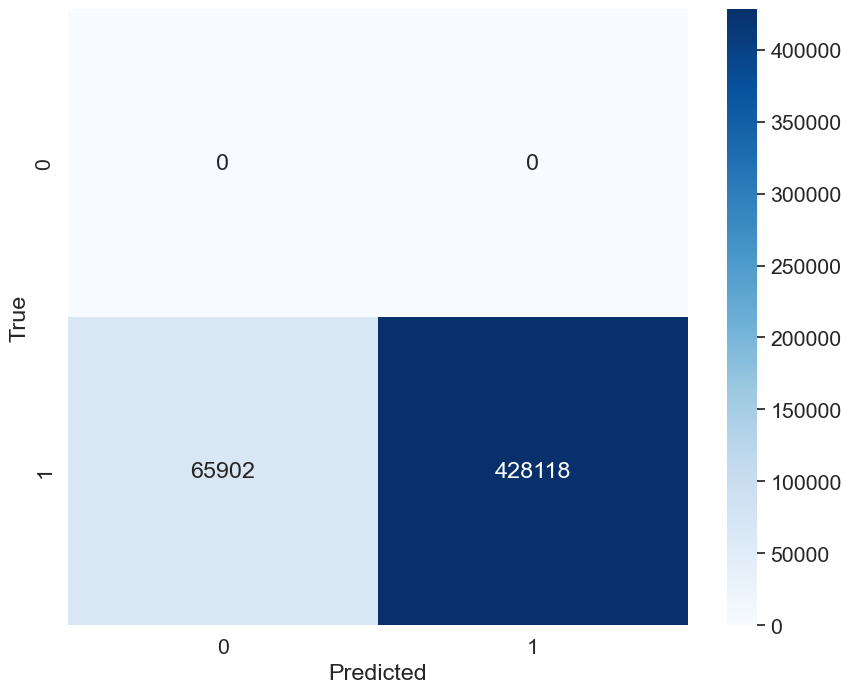

In [15]:

# 将标签列的特定值赋值为0，其他值赋值为1
# kdd['attack_type'] = kdd['attack_type'].apply(lambda x: 0 if x ==  'back.' or x == 'satan.' or x == 'ipsweep.' or x == 'portsweep.' else 1)
# kdd.describe()

y = y.apply(lambda x: -1 if x == 'normal.' else 1)
# 统计离群点个数
y.value_counts(1)

# 创建Isolation Forest模型
clf_isolation_forest = IsolationForest()
# 模型训练
clf_isolation_forest.fit(X)
# 预测结果
y_pred_isolation_forest = clf_isolation_forest.predict(X)


# 评价模型性能
evaluation(y, y_pred_isolation_forest)





c:\Users\Dustella\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


准确率： 0.8602769118659164
精确率： 0.5
召回率： 0.4301384559329582
F1值： 0.4624456210677966


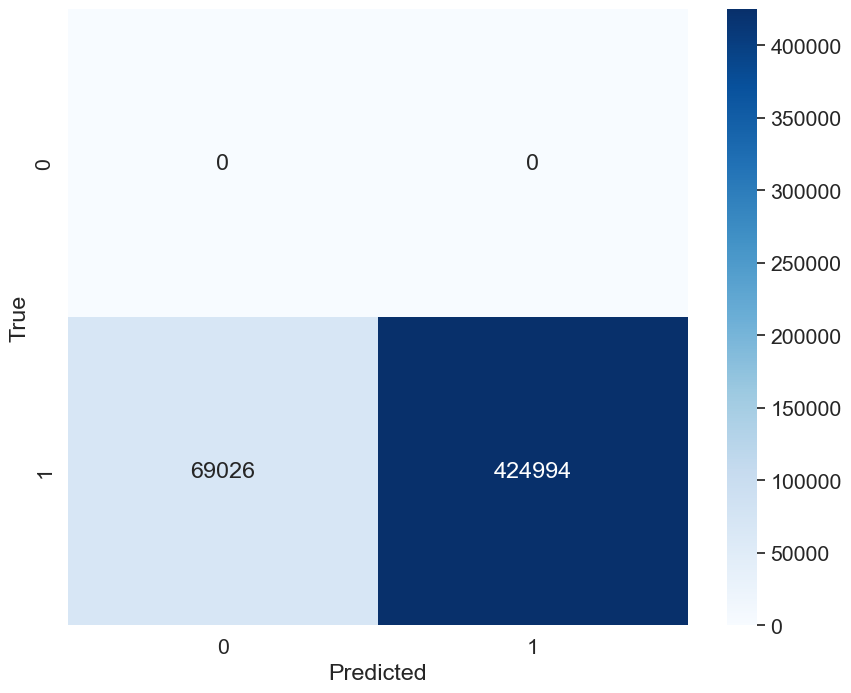

最佳参数: {'bootstrap': False, 'max_features': 0.1, 'max_samples': 0.5, 'n_estimators': 50}
最佳准确率: 0.9931561475243917
最佳召回率: 0.9931561475243917
最佳F1-score: 0.9965594295843905


['./best_IF_model.pkl']

In [13]:

# # 使用numpy.unique函数获取数据的唯一值和每个值的计数
# unique_values, counts = np.unique(y_pred_isolation_forest, return_counts=True)
#
# # 打印每个唯一值和对应的计数
# for value, count in zip(unique_values, counts):
#     print(f"值 {value} 的占比: {count/len(y_pred_isolation_forest)}")

# 输出该模型的聚类得分
evaluation(y,y_pred_isolation_forest)

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import joblib

# 创建Isolation Forest模型
model = IsolationForest(random_state=42)

# 设置参数网格进行调优
param_grid = {
    'n_estimators': [5, 10, 50],
    'max_samples': [0.1, 0.2, 0.5],
    'max_features': [0.1, 0.5, 1.0],
    'bootstrap': [True, False]
}

scoring = ['accuracy', 'recall', 'f1']

# 使用GridSearchCV进行参数调优
grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='f1', cv=2, n_jobs=-1)
grid_search.fit(X, y)

# 输出最佳参数和对应的性能指标
print("最佳参数:", grid_search.best_params_)
print("最佳准确率:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("最佳召回率:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
print("最佳F1-score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

# 获取最佳模型
best_model = grid_search.best_estimator_

# 保存最佳模型
joblib.dump(best_model, './best_IF_model.pkl')

